In [1]:
import os
import numpy.random as nr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly_express as px

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#displaying numbers instead of scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#for creating wordcloud
from wordcloud import WordCloud, STOPWORDS

import statsmodels.formula.api as smf

In [6]:
df = pd.read_csv('homeworkdata.csv')

In [7]:
df = df[['meanOutcome1', 'meanOutcome2', 'meanOutcome3']]
df.rename(columns = {'meanOutcome1':'org_commitment', 'meanOutcome2':'belief_in_mission', 'meanOutcome3':'employee_engagement'}, inplace = True)

In [12]:
reg = smf.ols('org_commitment ~ belief_in_mission', data=df).fit()
print(' ')
print('First Block')
reg.summary()

print(' ')
print('Second Block')
reg2 = smf.ols('org_commitment ~ belief_in_mission + employee_engagement', data = df).fit()
reg2.summary()

 
First Block


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         org_commitment   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     115.9
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           8.02e-25
Time:                        11:19:18   Log-Likelihood:                -729.19
No. Observations:                 597   AIC:                             1462.
Df Residuals:                     595   BIC:                             1471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3979      0.303      7.923      0.000       1.803       2.992
belief_in_mission     0.7568      0.070     10.767      0.000       0.619       0.895
==============================================================================
Omnibus:                       33.189   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.242
Skew:                          -0.585   Prob(JB):                     8.18e-09
Kurtosis:                       3.357   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 
Second Block


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         org_commitment   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     107.7
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.19e-40
Time:                        11:19:19   Log-Likelihood:                -689.94
No. Observations:                 597   AIC:                             1386.
Df Residuals:                     594   BIC:                             1399.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5316      0.299      5.121      0.000       0.944       2.119
belief_in_mission       0.6068      0.068      8.939      0.000       0.473       0.740
employee_engagement     0.3746      0.041      9.137      0.000       0.294       0.455
==============================================================================
Omnibus:                       17.257   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.081
Skew:                          -0.424   Prob(JB):                     0.000118
Kurtosis:                       3.087   Cond. No.                         58.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Compare two regression models with an ANOVA

In [17]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

anovaResults = anova_lm(reg, reg2)
print(anovaResults)

   df_resid    ssr  df_diff  ss_diff     F  Pr(>F)
0 595.00    402.18 0.00     nan      nan   nan    
1 594.00    352.62 1.00     49.56    83.49 0.00   


In [20]:
print(f'Change in R-Squared From First to Second Model: {round(.266 - .163, 3)}')

Change in R-Squared From First to Second Model: 0.103


## Scatterplots Between IVs and DV

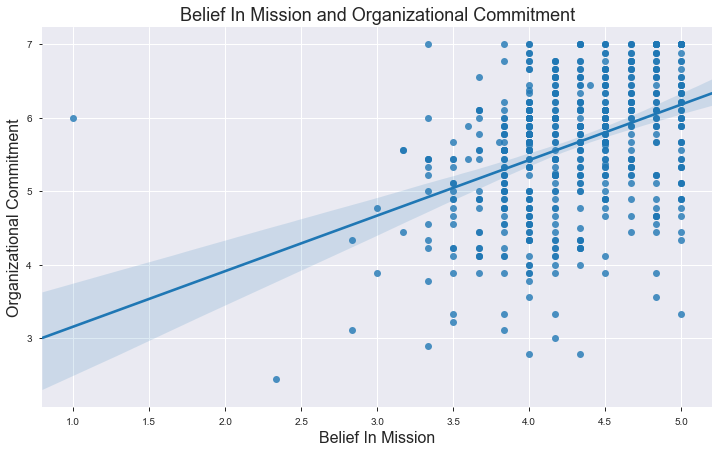

In [22]:
plt.figure(figsize = (12, 7))
sns.regplot(x = 'belief_in_mission', y = 'org_commitment', data = df)
plt.title('Belief In Mission and Organizational Commitment', fontsize = 18)
plt.xlabel('Belief In Mission', fontsize = 16)
plt.ylabel('Organizational Commitment', fontsize = 16);

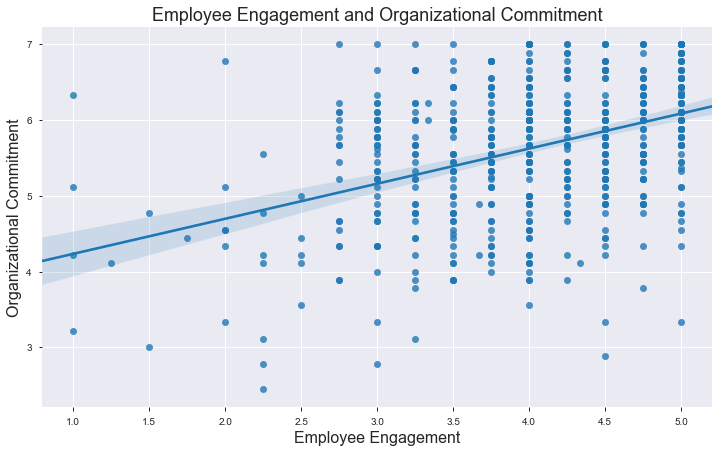

In [23]:
plt.figure(figsize = (12, 7))
sns.regplot(x = 'employee_engagement', y = 'org_commitment', data = df)
plt.title('Employee Engagement and Organizational Commitment', fontsize = 18)
plt.xlabel('Employee Engagement', fontsize = 16)
plt.ylabel('Organizational Commitment', fontsize = 16);